In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.tri as tri

In [5]:
from netpy.nets import FeedForwardNet

net = FeedForwardNet(name = 'ocean_oc')

net.load_net_data()
net.load_weights()

In [6]:
def normalize(data, min, max):
    return float((data-min)/(max-min))

data = genfromtxt('data/kurils.csv', delimiter=' ')

year = normalize(2013, 0, 2030)
day = normalize(1, 1, 367)
hour = normalize(0, 0, 24)

val = np.array([])
x = np.array([])
y = np.array([])

neuro_val = np.array([])

for i in range(len(data)):
    # широта
    lat = data[i][0]
    # долгота
    lon = data[i][1]

    x=np.hstack((x, lat))
    y=np.hstack((y, lon))
    
    val=np.hstack((val, data[i][2]/10))
    neuro_val=np.hstack((neuro_val, net.forward([year, day, hour, lat, lon])))

In [7]:
neuron_matrix = np.matrix([x, y, neuro_val]).transpose()

print(val)
print(neuro_val)

print(max(val), min(val))
print(max(neuro_val), min(neuro_val))

np.savetxt("data/neurokurils.csv", neuron_matrix, delimiter=' ')

[0.51022887 0.51022887 0.51022887 ... 0.51022887 0.51022887 0.51022887]
[0.54176877 0.54176618 0.5417636  ... 0.53604177 0.53603796 0.53603416]
0.5102288722991943 0.5102288722991943
0.5417687683082458 0.5360341617307357


In [8]:
def draw_heatmap(x, y, z, name):
    X = x
    Y = y
    Z = z
    
    xi = np.linspace(X.min(),X.max(),1000)
    yi = np.linspace(Y.min(),Y.max(),1000)

    
    zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')
    
    zmin = 0
    zmax = 1
    
    zi[(zi<zmin) | (zi>zmax)] = None
    
    CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                vmax=zmax, vmin=zmin)
    
    plt.colorbar()
    plt.savefig(name)
    plt.show()

/home/alex/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/home/alex/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


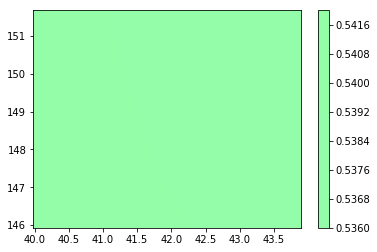

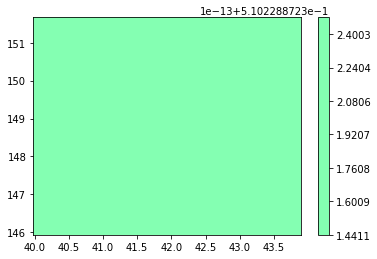

In [9]:
draw_heatmap(x, y, neuro_val, "neurokurils.png")
draw_heatmap(x, y, val, "kurils.png")